# NEWS CLASSIFIER SYSTEM

# DATA-CLEANING PROCESS

# importing libraries

In [18]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [3]:
data = pd.read_csv("D:\\CARRIER FAIR NLP NEWS CLASSIFIER\\bbc-text.csv")
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
data.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


In [6]:
data.dtypes

category    object
text        object
dtype: object

In [7]:
data.columns

Index(['category', 'text'], dtype='object')

In [9]:
data.duplicated().sum()

99

$$
Clearing-All-Duplicates-From-Data
$$

In [10]:
data = data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

$$
Text-Cleaning
$$

In [12]:
import re
import string
from nltk.corpus import stopwords

In [13]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def text_process(text):
    clean_txt = re.sub(r"\n","",text)
    clean_txt = [char for char in clean_txt if char not in string.punctuation]
    clean_txt = ''.join(clean_txt)
    clean_txt = " ".join(word for word in clean_txt.split() if word.lower() not in stopwords.words('english'))
    return clean_txt

In [17]:
data['cleaned_text'] = data['text'].apply(text_process)
data.head()

,category,text,cleaned_text
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...


**Word Cloud**

In [19]:
from textblob import TextBlob
from wordcloud import WordCloud
combined = " ".join(word for word in data['cleaned_text'])

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

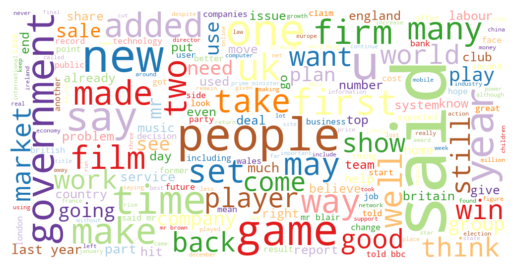

In [22]:
wordcloud = WordCloud(width=1000,height = 500,random_state=20,max_font_size=150,background_color= 'white',colormap='Paired_r').generate(combined)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

**Clustering**

In [23]:
cluster_data = data.drop(['text','category'],axis=1)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cluster_data.cleaned_text.values)

In [25]:
clust = KMeans(init='k-means++',n_clusters=4,n_init=10)
clust.fit(X)

KMeans(n_clusters=4, n_init=10)

In [26]:
predictions = clust.predict(X)

In [28]:
cluster_data['cluster_labels'] = clust.labels_

In [29]:
cluster_data.head()

,cleaned_text,cluster_labels
0,tv future hands viewers home theatre systems p...,0
1,worldcom boss left books alone former worldcom...,2
2,tigers wary farrell gamble leicester say rushe...,1
3,yeading face newcastle fa cup premiership side...,1
4,ocean twelve raids box office ocean twelve cri...,0


In [30]:
cluster_data['cluster_labels'].value_counts()

cluster_labels
0    860
1    499
2    478
3    289
Name: count, dtype: int64

**Text Classification**

In [35]:
# Check column names
print(data.columns)

# Check if 'label' column exists
if 'label' in data.columns:
    print("Label column exists")
else:
    print("Label column does not exist")

Index(['category', 'text', 'cleaned_text'], dtype='object')
Label column does not exist


In [36]:
X = vectorizer.fit_transform(data['cleaned_text'].values).toarray()
y = data['category']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [38]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
# 5 Cross-validation

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=5)
  for idx, accuracy in enumerate(accuracies):
    entries.append((model_name, idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'idx', 'accuracy'])

d:\PROJECT\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\PROJECT\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\PROJECT\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\PROJECT\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\PROJECT\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default va

**Model Selection**

In [39]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
mean_accuracy

model_name
LinearSVC                 0.982596
LogisticRegression        0.971778
MultinomialNB             0.961431
RandomForestClassifier    0.867827
Name: accuracy, dtype: float64

In [40]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

d:\PROJECT\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [43]:
print('\t\t\CLASSIFICATIION METRICS')
print(metrics.classification_report(y_test, y_pred, 
target_names= data['category'].unique()))

		\CLASSIFICATIION METRICS
               precision    recall  f1-score   support

         tech       0.98      0.97      0.98       151
     business       0.99      1.00      0.99        98
        sport       0.97      0.97      0.97       118
entertainment       1.00      1.00      1.00       159
     politics       0.98      0.98      0.98       112

     accuracy                           0.99       638
    macro avg       0.99      0.99      0.99       638
 weighted avg       0.99      0.99      0.99       638



**Predicting the Class**

In [44]:
text ='Wheezing widespread problem children 5 years old India According American Academy Paediatrics 50 children would least one episode wheezing 5 years age child wheezes first question happens one’s mind whether child asthma whether require medicines long duration article let’s discuss myths facts wheezing treatment children 5 yearsMyth 1 wheezing asthmaFact fact viral infections common cause wheezing children five years age 60 children experience recurrent wheezing age 5 stop wheezing won’t develop asthma age However there’s family history asthma allergyrelated skin disease child may continue wheeze even age 5Myth 2 Inhalers harmful addictive used childrenFacts Inhalers safe nonaddictive medication used children relieve control asthma symptoms long run considered lifeline wheezing children used firstline medication prescribed doctor instead syrups tablets recommendation supported international organizations Global Initiative Asthma GINA children age 5Myth 3 Inhalers used children similar given adults lead overdosageFact Aerosol delivery devices adults children However dosage frequency use may differ based age severity wheeze Also amount drug deposited lungs depends upon breathing capacity person Adult lungs handle air volume resulting medication deposited dosage Pediatric lungs smaller receive less medication important consult doctor appropriate dosage control symptomsMyth 4 Inhalers contain steroids harm child growth developmentFact Inhalers contain steroids microgram doses 1000 times less dose syrups tablet steroids given wheeze exacerbations Inhalers like ointments drug gets deposited surface action required oral medications taken get absorbed intestines blood resulting delivery drug body parts action intended Hence side effects inhalers less compared oral medicationsMyth 5 Inhalers used severe cases wheezingFact Inhalers medications relieve also prevent recurrent wheezing long run Even child mild persistent asthma symptoms controllable inhalers oral medications standard careMyth 6 Inhalers cure asthmaFact Inhaler medications classified two categories – relievers controllers Relievers used alleviate wheezing controllers given prevent recurrent wheezing children Asthma allergy managed medications avoidance triggers It’s important note control possible cure However previously mentioned article children experience wheezing age 5 affected allergies asthma symptoms may improve age 6Myth 7 Nebulizers better inhalers used homeFact Nebulizers helpful sick children difficulty breathing wheezing However children breathing problems inhalers enough provide relief safe use nebulizers home children 5 years old using home machines without oxygen lead decrease oxygen levels unconsciousness Instead inhalers used home improvement inhalers important consult pediatrician go emergency room treatmentIn conclusion wheezing children mostly due viral infections Inhalers safe effective way manage wheeze children 5 years age essential help build awareness inhalers form important way wheeze treated Parents caregivers consult child’s doctor ensure child using inhalers correctly effectively Dr Karthik Narayanan R MD Pediatrics DM Pediatric critical care Emergency MedicineSenior Consultant Rainbow Children’s Hospital ChennaiDr Karthik Narayanan RMD Pediatrics DM Pediatric critical care Emergency Medicine Senior Consultant Rainbow Children’s Hospital ChennaiDisclaimerThis content sponsored reflect views opinions IE Online Media Services Pvt Ltd journalist involved creating sponsored material imply endorsement whatsoever editorial team IE Online Media Services takes responsibility content appears sponsored articles consequences thereof directly indirectly manner Viewer discretion advised'

In [45]:
vect_text = vectorizer.transform([text])
result = model.predict(vect_text)[0]

In [46]:
print(f"The text belongs to the category: {result}")

The text belongs to the category: politics


**Saving the model as pickle file**

In [48]:
import pickle
with open('NCS_text_model.pkl','wb') as file:
    pickle.dump(model,file)

# WEB-SCRAPPING PROCESS

In [58]:
from bs4 import BeautifulSoup as soup
import requests

**Parenting**

In [89]:
html = requests.get('https://indianexpress.com/parenting/page/9/')             #THE HINDU e-paper parenting page url link

In [90]:
bsobj = soup(html.content,'lxml')            # or bsobj = BeautifulSoup(html.content, 'html.parser')

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

In [91]:
bsobj = soup(html.content, 'html.parser')

In [92]:
check = []
for news in bsobj.findAll("h2"):
  check.append(news.text)

In [93]:
len(check)

8

In [ ]:
text.extend(check)

In [94]:
title = []
for news in bsobj.findAll("h2"):
  title.append(news.text)
     

In [95]:
len(title)

8

In [96]:
try:
  links = []
  for news in bsobj.findAll("h2",{'class':'title'}):
   links.append(news.a['href'])
except:
  pass

In [97]:
len(links)

0

In [98]:
check1 = []
for link in links:
  page = requests.get(link)
  bs = soup(page.content)
  for news in bs.findAll('div',{'class':'story_details'}):
    check1.append(news.text.strip())

In [99]:
len(check1)

0

In [ ]:
text.extend(check1)

In [100]:
content = []
for link in links:
  page = requests.get(link)
  bs = soup(page.content)
  for news in bs.findAll('div',{'class':'story_details'}):
    content.append(news.text.strip())

In [101]:
len(content)

0

In [ ]:
import pandas as pd
my_dic1 = {'title':title,'content':content}
df = pd.DataFrame(my_dic1)
df['label'] = 'parenting'

In [103]:
df

,title,content,label
0,Improving Survival Rates of Pediatric Cancers ...,"When previously healthy, active 3 years old Sa...",parenting
1,Paris-based artist Sujata Bajaj on what makes ...,"Making art accessible to children, one artist ...",parenting
2,‘There is no one-size-fits-all approach to par...,"Over the years, Anuradha Premnath, a mother an...",parenting
3,5 powerful ways to improve your child’s memory...,Most individuals have occasional lapses in mem...,parenting
4,Children and teens aren’t doing enough physica...,Physical inactivity is the fourth leading caus...,parenting
5,Take Time: Is your tween showing the following...,"As a working mental-health professional, I see...",parenting
6,Doctor in the House: How to potty train your t...,Toilet training or potty training is a corners...,parenting
7,What makes French-American artist Louise Josép...,Artwork: Maman (sculpture)\nArtist: Louise Bou...,parenting
8,All You Need to Know About Absence EpilepsySub...,6-year-old Master A was brought to the hospita...,parenting
9,What are the small ways you might want to opt ...,"As the new year rolls out, it makes many of us...",parenting


**Politics**

In [167]:

html = requests.get('https://indianexpress.com/section/political-pulse/page/9/')

In [116]:
bs = soup(html.content,'lxml')

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

In [168]:
bs = soup(html.content, 'html.parser')

In [169]:
for news in bs.findAll("h2"):
    title.append(news.text)

In [170]:
len(title)

50

In [171]:
try:
  links = []
  for news in bs.findAll("h2",{'class':'title'}):
          links.append(news.a['href'])
          
except:
  pass
links

['https://indianexpress.com/article/political-pulse/cross-voting-rajya-sabha-polls-sanjay-seth-jds-9183702/',
 'https://indianexpress.com/article/political-pulse/victims-mob-lynching-bulldozer-culture-pasmanda-muslims-report-9183561/',
 'https://indianexpress.com/article/political-pulse/rajya-sabha-polls-sp-mlas-bjp-india-9183390/',
 'https://indianexpress.com/article/political-pulse/bjp-caste-census-demand-nitish-kumar-9183337/',
 'https://indianexpress.com/article/political-pulse/congress-seats-uttar-pradesh-deal-samajwadi-party-2019-9183229/',
 'https://indianexpress.com/article/political-pulse/rajya-sabha-polls-rahul-gandhi-pm-modi-kerala-tamil-nadu-visit-9182915/',
 'https://indianexpress.com/article/political-pulse/rajya-sabha-polls-today-sp-up-congress-karnataka-himachal-9182870/',
 'https://indianexpress.com/article/political-pulse/kerala-cpi-annie-raja-interview-9182476/',
 'https://indianexpress.com/article/political-pulse/sajad-lone-ls-poll-fray-baramulla-peoples-conference-

In [172]:
for link in links:
  page = requests.get(link)
  bs = soup(page.content)
  for news in bs.findAll('div',{'class':'story_details'}):
    content.append(news.text.strip())

In [173]:
len(content)

50

In [174]:
my_dic2 = {'title':title,'content':content}
p_df = pd.DataFrame(my_dic2)
p_df['label']= 'politics'
p_df    

,title,content,label
0,Thankamani movie review: Dileep film offers a ...,"Kerala too, like many other parts of India, ha...",politics
1,"Prabhas, Disha Patani jet off to Italy for Kal...",Actors Prabhas and Disha Patani left for Italy...,politics
2,Queen remains a timeless coming-of-age tale bu...,“No matter what I do I will forever be remembe...,politics
3,"Karan Kundrra’s new car gets stolen, asks ‘pra...",Actor Karan Kundrra made a distressed video on...,politics
4,Maidaan trailer: Ajay Devgn has a Chak De Indi...,"After a prolonged delay, fans will finally be ...",politics
5,Captivating the King actor Cho Jung Seok is a ...,"“I want to evoke curiosity, make people wonder...",politics
6,Camila Cabello calls decision of reuniting wit...,"Last April, when former lovebirds Shawn Mendes...",politics
7,Saif Ali Khan bats for Kareena Kapoor as she i...,Actors Kareena Kapoor Khan and Saif Ali Khan a...,politics
8,Twinkle Khanna spends quality time with her fu...,Actor-turned-author Twinkle Khanna took to her...,politics
9,Shark Tank India 3: Deepinder Goyal joins Anup...,Shark Tank India Season 3 has been getting int...,politics


**Lifestyle**

In [175]:

html = requests.get('https://indianexpress.com/section/lifestyle/page/9/')

In [135]:
bs2 = soup(html.content,'lxml')

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

In [176]:
bs2 = soup(html.content, 'html.parser')

In [177]:
check = []
for news in bs2.findAll("h2"):
    check.append(news.text)
     

In [178]:
len(check)

25

In [179]:
try:
  links = []
  for news in bs2.findAll("h2",{'class':'title'}):
          links.append(news.a['href'])
except:
  pass

In [180]:
len(links)

25

In [181]:
check1 =[]
for link in links:
  page = requests.get(link)
  bs = soup(page.content)
  for news in bs.findAll('div',{'class':'story_details'}):
    check1.append(news.text.strip())
     

In [182]:
len(check1)

25

In [183]:
content.extend(check1) 

In [184]:
for link in links:
  page = requests.get(link)
  bs = soup(page.content)
  for news in bs.findAll('div',{'class':'story_details'}):
    content.append(news.text.strip())

In [188]:
len(content)

100

In [190]:
df.columns

Index(['title', 'content', 'label'], dtype='object')

In [189]:
my_dic3 = {'title':title,'content':content}
sp_df = pd.DataFrame(my_dic3)
sp_df['label']= 'lifestyle'

sp_df

ValueError: All arrays must be of the same length

**Entertainment**

In [148]:
html = requests.get('https://indianexpress.com/section/entertainment/page/9/')

In [151]:
bs3 = soup(html.content,'lxml')

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

In [152]:
bs3 = soup(html.content, 'html.parser')

In [153]:
check = []
for news in bs3.findAll('div',{'class':'title'}):
  check.append(news.a['title'])

In [154]:
len(check)

25

In [155]:
title.extend(check)

In [156]:
title = []
for news in bs3.findAll('div',{'class':'title'}):
  title.append(news.a['title'])

In [157]:
len(title)

25

In [158]:
try:
  links = []
  for news in bs3.findAll('div',{'class':'title'}):
          links.append(news.a['href'])
except:
  pass

In [159]:
len(links)

25

In [160]:
check1 =[]
for link in links:
  page = requests.get(link)
  bs = soup(page.content)
  for news in bs.findAll('div',{'class':'story_details'}):
    check1.append(news.text.strip())

In [161]:
len(check1)

25

In [162]:
content.extend(check1)

In [163]:
content = []
for link in links:
  page = requests.get(link)
  bs = soup(page.content)
  for news in bs.findAll('div',{'class':'story_details'}):
    content.append(news.text.strip())

In [164]:
len(content)

25

In [165]:
my_dic4 = {'title':title,'content':content}
en_df = pd.DataFrame(my_dic4)
en_df['label']= 'entertainmaent'
     
en_df
     

,title,content,label
0,Thankamani movie review: Dileep film offers a ...,"Kerala too, like many other parts of India, ha...",entertainmaent
1,"Prabhas, Disha Patani jet off to Italy for Kal...",Actors Prabhas and Disha Patani left for Italy...,entertainmaent
2,Queen remains a timeless coming-of-age tale bu...,“No matter what I do I will forever be remembe...,entertainmaent
3,"Karan Kundrra’s new car gets stolen, asks ‘pra...",Actor Karan Kundrra made a distressed video on...,entertainmaent
4,Maidaan trailer: Ajay Devgn has a Chak De Indi...,"After a prolonged delay, fans will finally be ...",entertainmaent
5,Captivating the King actor Cho Jung Seok is a ...,"“I want to evoke curiosity, make people wonder...",entertainmaent
6,Camila Cabello calls decision of reuniting wit...,"Last April, when former lovebirds Shawn Mendes...",entertainmaent
7,Saif Ali Khan bats for Kareena Kapoor as she i...,Actors Kareena Kapoor Khan and Saif Ali Khan a...,entertainmaent
8,Twinkle Khanna spends quality time with her fu...,Actor-turned-author Twinkle Khanna took to her...,entertainmaent
9,Shark Tank India 3: Deepinder Goyal joins Anup...,Shark Tank India Season 3 has been getting int...,entertainmaent


In [ ]:
final_df = pd.concat([df,p_df,sp_df,en_df],axis = 0,ignore_index=True)
final_df.info()

In [ ]:
final_df.to_csv('NCS_nlp_data.csv',index =False)